# Code

In [104]:
%matplotlib inline

In [105]:
from bezier import Bezier, fit_bezier
from scipy import linspace

# Test Bezier

In [128]:
b = Bezier([(-1,1), (3,3), (4,-1), (2,-1)])

# Degree Elevation

In [129]:
b1 = b.elevate()
b2 = b.elevate(degree=2)

In [130]:
b_points = np.array([b.point(t) for t in linspace(0.0, 1.0, 40)])
b1_points = np.array([b1.point(t) for t in linspace(0.0, 1.0, 20)])
b2_points = np.array([b2.point(t) for t in linspace(0.0, 1.0, 17)])

b_ctrl_points = np.array([p.point for p in b.ctrl_points])
b1_ctrl_points = np.array([p.point for p in b1.ctrl_points])
b2_ctrl_points = np.array([p.point for p in b2.ctrl_points])

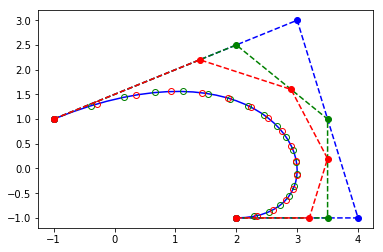

In [131]:
plt.plot(b_points[:,0], b_points[:,1], 'b-')
plt.plot(b1_points[:,0], b1_points[:,1], 'go', mfc='none')
plt.plot(b2_points[:,0], b2_points[:,1], 'ro', mfc='none')

plt.plot(b_ctrl_points[:,0], b_ctrl_points[:,1], 'b--o')
plt.plot(b1_ctrl_points[:,0], b1_ctrl_points[:,1], 'g--o')
plt.plot(b2_ctrl_points[:,0], b2_ctrl_points[:,1], 'r--o')

plt.show()

# Nearest Point

In [112]:
p = (4, 2.5)
tn = b.nearest_point(p)

AttributeError: 'Bezier' object has no attribute 'nearest_point'

TypeError: 'CtrlPoint' object does not support indexing

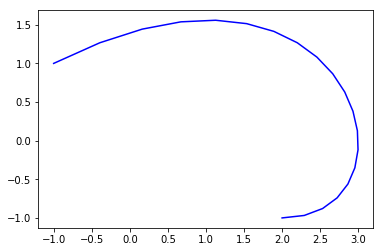

In [113]:
plt.plot([b.point(t)[0] for t in t_vals], [b.point(t)[1] for t in t_vals], 'b-')
plt.plot([c[0] for c in b], [c[1] for c in b], 'b--.')
plt.plot([b.point(tn)[0], p[0]], [b.point(tn)[1], p[1]], 'r--o')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

# Split (de Casteljau)

In [123]:
l, r = b.split(t=0.5)

In [136]:
b_ctrl_points = np.array([p.point for p in b.ctrl_points])
l_ctrl_points = np.array([p.point for p in l.ctrl_points])
r_ctrl_points = np.array([p.point for p in r.ctrl_points])

b_points = np.array([b.point(t) for t in linspace(0.0, 1.0, 16)])
l_points = np.array([l.point(t) for t in linspace(0.0, 1.0, 20)])
r_points = np.array([r.point(t) for t in linspace(0.0, 1.0, 20)])

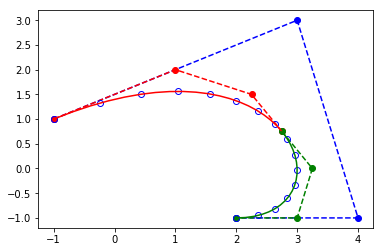

In [137]:
plt.plot(b_ctrl_points[:,0], b_ctrl_points[:,1], 'b--o')
plt.plot(l_ctrl_points[:,0], l_ctrl_points[:,1], 'r--o')
plt.plot(r_ctrl_points[:,0], r_ctrl_points[:,1], 'g--o')

plt.plot(b_points[:,0], b_points[:,1], 'bo', mfc='none')
plt.plot(l_points[:,0], l_points[:,1], 'r-')
plt.plot(r_points[:,0], r_points[:,1], 'g-')

plt.show()

# Regression Fit Results

In [209]:
t0 = linspace(0.0, 1.0, 100)
t1 = linspace(0.0, 1.0, 100)
noise_pnts0 = np.array([b.point(t) for t in t0]) + 0.001*(np.random.rand(len(t0), 2)-0.5)
noise_pnts1 = np.array([b.point(t) for t in t1]) + 0.250*(np.random.rand(len(t1), 2)-0.5)

b0 = fit_bezier(noise_pnts0, b.deg)
b1 = fit_bezier(noise_pnts1, b.deg)

In [210]:
b_ctrl_points = np.array([p.point for p in b.ctrl_points])
b_points = np.array([b.point(t) for t in linspace(0.0, 1.0, 16)])

In [211]:
b0_ctrl_points = np.array([p.point for p in b0.ctrl_points])
b0_points = np.array([b0.point(t) for t in linspace(0.0, 1.0, 16)])

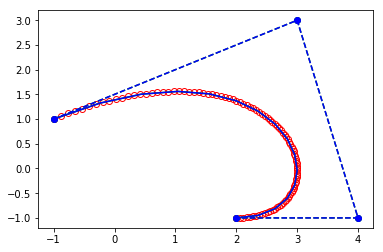

        orig x fitted x   orig y fitted y
    0   -1.000   -1.000    1.000    1.000
    1    3.000    3.000    3.000    3.000
    2    4.000    4.000   -1.000   -1.000
    3    2.000    2.000   -1.000   -1.000


In [212]:
plt.plot(noise_pnts0[:,0], noise_pnts0[:,1], 'ro', mfc='none')

plt.plot(b_points[:,0], b_points[:,1], 'g-')
plt.plot(b0_points[:,0], b0_points[:,1], 'b-')

plt.plot(b_ctrl_points[:,0], b_ctrl_points[:,1], 'g--o')
plt.plot(b0_ctrl_points[:,0], b0_ctrl_points[:,1], 'b--o')

plt.show()

print("{0:>5} {1:>8} {2:>8} {3:>8} {4:>8}".format(' ', 'orig x', 'fitted x', 'orig y', 'fitted y'))
for i, (cp, cp0) in enumerate(zip(b.ctrl_points, b0.ctrl_points)):
    print("{0:>5} {1:>8.3f} {2:>8.3f} {3:>8.3f} {4:>8.3f}".format(str(i), cp.point[0], cp0.point[0], cp.point[1], cp0.point[1]))

In [213]:
b1_ctrl_points = np.array([p.point for p in b1.ctrl_points])
b1_points = np.array([b1.point(t) for t in linspace(0.0, 1.0, 16)])

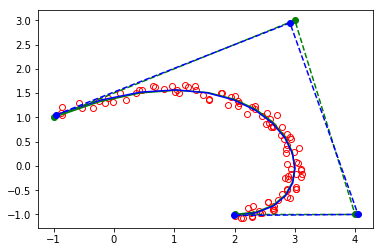

        orig x fitted x   orig y fitted y
    0   -1.000   -0.966    1.000    1.050
    1    3.000    2.919    3.000    2.946
    2    4.000    4.048   -1.000   -0.998
    3    2.000    1.991   -1.000   -1.019


In [214]:
plt.plot(noise_pnts1[:,0], noise_pnts1[:,1], 'ro', mfc='none')

plt.plot(b_points[:,0], b_points[:,1], 'g-')
plt.plot(b1_points[:,0], b1_points[:,1], 'b-')

plt.plot(b_ctrl_points[:,0], b_ctrl_points[:,1], 'g--o')
plt.plot(b1_ctrl_points[:,0], b1_ctrl_points[:,1], 'b--o')

plt.show()

print("{0:>5} {1:>8} {2:>8} {3:>8} {4:>8}".format(' ', 'orig x', 'fitted x', 'orig y', 'fitted y'))
for i, (cp, cp0) in enumerate(zip(b.ctrl_points, b1.ctrl_points)):
    print("{0:>5} {1:>8.3f} {2:>8.3f} {3:>8.3f} {4:>8.3f}".format(str(i), cp.point[0], cp0.point[0], cp.point[1], cp0.point[1]))